C:\Users\yangchufeng\AppData\Local\Temp\ipykernel_19856\4033414787.py:48: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from current font.
  plt.tight_layout()
C:\Users\yangchufeng\AppData\Local\Temp\ipykernel_19856\4033414787.py:48: UserWarning: Glyph 38469 (\N{CJK UNIFIED IDEOGRAPH-9645}) missing from current font.
  plt.tight_layout()
C:\Users\yangchufeng\AppData\Local\Temp\ipykernel_19856\4033414787.py:48: UserWarning: Glyph 22369 (\N{CJK UNIFIED IDEOGRAPH-5761}) missing from current font.
  plt.tight_layout()
C:\Users\yangchufeng\AppData\Local\Temp\ipykernel_19856\4033414787.py:48: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
C:\Users\yangchufeng\AppData\Local\Temp\ipykernel_19856\4033414787.py:48: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  plt.tight_layout()
C:\Users\yangchufeng\AppData\Local\Temp\ipykernel_19856\4033414787.py:48: UserWarning: Glyph 26377 (

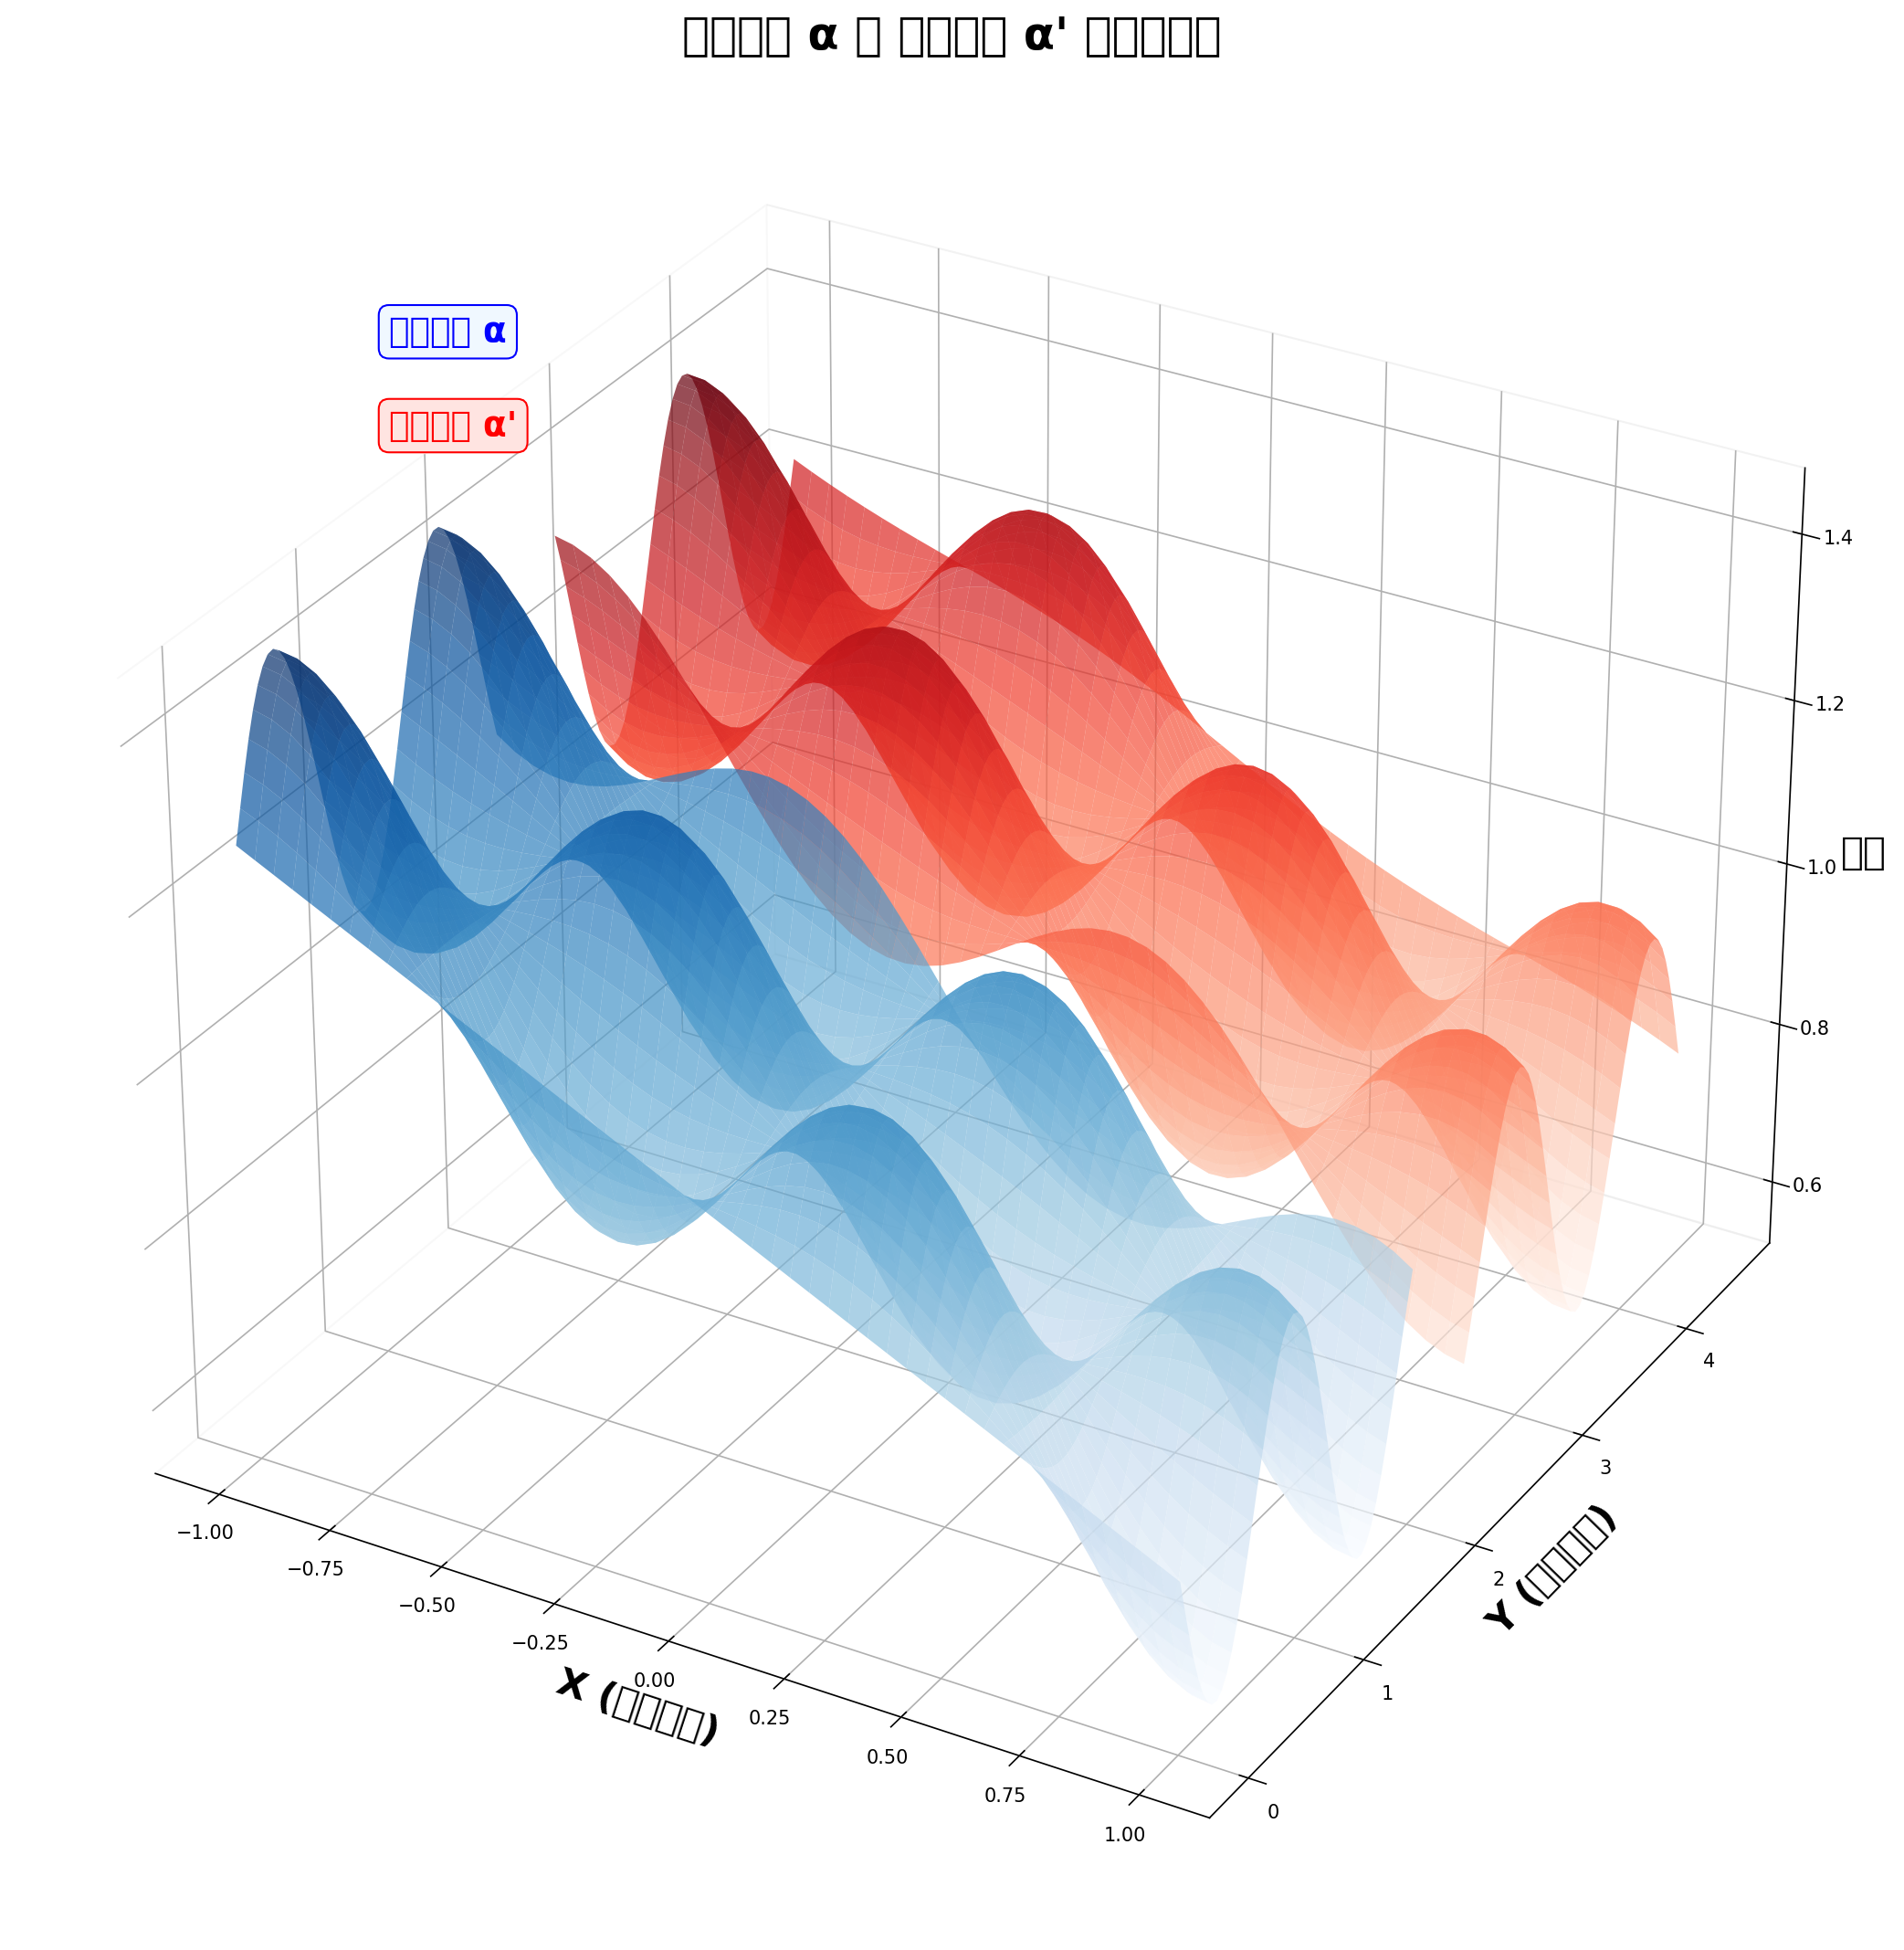

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 创建一个网格以模拟海底的坡度
x = np.linspace(-1, 1, 50)
y = np.linspace(0, 2, 50)
X, Y = np.meshgrid(x, y)

# 实际坡度 α
Z = 1 - np.tan(np.radians(15)) * X

# 有效坡度 α'
X_prime, Y_prime = np.meshgrid(x, y)
Z_prime = 1 - np.tan(np.radians(15)) * X_prime * np.cos(np.radians(30))

# 创建一个3D图形
fig = plt.figure(figsize=(14, 16), dpi=150)  # 增加dpi以提高分辨率
ax = fig.add_subplot(111, projection='3d')

# 设置观察角度
ax.view_init(30, -60)

# 使用曲线风格绘制实际坡度和有效坡度
Z_mod1 = Z + 0.2 * np.sin(5 * X) * np.sin(5 * Y)
Z_mod2 = Z_prime + 0.2 * np.sin(5 * X_prime) * np.sin(5 * Y_prime + 2.5)

# 使用颜色映射绘制两个面
cmap = mcolors.LinearSegmentedColormap.from_list("", ["deepskyblue", "saddlebrown"])
surf1 = ax.plot_surface(X, Y, Z_mod1, cmap="Blues", linewidth=0, antialiased=True, alpha=0.7, edgecolor='k')
surf2 = ax.plot_surface(X_prime, Y_prime + 2.5, Z_mod2, cmap="Reds", linewidth=0, antialiased=True, alpha=0.7, edgecolor='k')

# 添加注释和标签
ax.set_title("实际坡度 α 与 有效坡度 α' 之间的关系", fontsize=24, fontweight='bold')  # 增大字体并加粗
ax.set_xlabel('X (水平方向)', fontsize=20, fontweight='bold')  # 增大字体并加粗
ax.set_ylabel('Y (测线方向)', fontsize=20, fontweight='bold')  # 增大字体并加粗
ax.set_zlabel('深度', fontsize=20, fontweight='bold')  # 增大字体并加粗
ax.text2D(0.2, 0.85, "实际坡度 α", transform=ax.transAxes, color='blue', fontsize=18, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", edgecolor="blue", facecolor="aliceblue"))
ax.text2D(0.2, 0.8, "有效坡度 α'", transform=ax.transAxes, color='red', fontsize=18, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", facecolor="mistyrose"))

# 增强网格线
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

# 显示图形
plt.tight_layout()
plt.show()


In [4]:
import numpy as np
import pandas as pd

# 定义参数
theta = np.radians(120)  # 多波束换能器的开角
alpha = np.radians(1.5)  # 海底坡度
D = 120  # 海域中心点处的海水深度
X_values = np.array([0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1]) * 1852  # 转换海里到米
beta_values = np.radians(np.array([0, 45, 90, 135, 180, 225, 270, 315]))  # 转换度到弧度

# 初始化结果矩阵
results = np.zeros((len(beta_values), len(X_values)))

# 对于每一个beta值和X值，计算覆盖宽度
for i, beta in enumerate(beta_values):
    # Calculate effective slope
    alpha_prime = np.arctan(np.tan(alpha) * np.cos(beta))
    for j, X in enumerate(X_values):
        if beta == np.pi/2 or beta == 3*np.pi/2:  # For 90 and 270 degrees, the depth remains constant
            Dx = D
        elif beta == 0 or beta == np.pi/4 or beta == 7*np.pi/4:  # For 0, 45 and 315 degrees, move downward along the slope
            Dx = D + X * np.tan(alpha_prime)
        else:  # For other angles, move upward along the slope
            Dx = D - X * np.tan(alpha_prime)
        Wx = 2 * Dx / np.cos(alpha_prime) * np.tan(theta / 2)
        results[i, j] = Wx

df_final_corrected_results = pd.DataFrame(results,
                                          columns=[f"{x:.1f}" for x in X_values / 1852],
                                          index=[0, 45, 90, 135, 180, 225, 270, 315])
df_final_corrected_results
df_final_corrected_results.to_excel(r'Desktop\result2.xlsx', index=True, encoding='utf-8-sig')

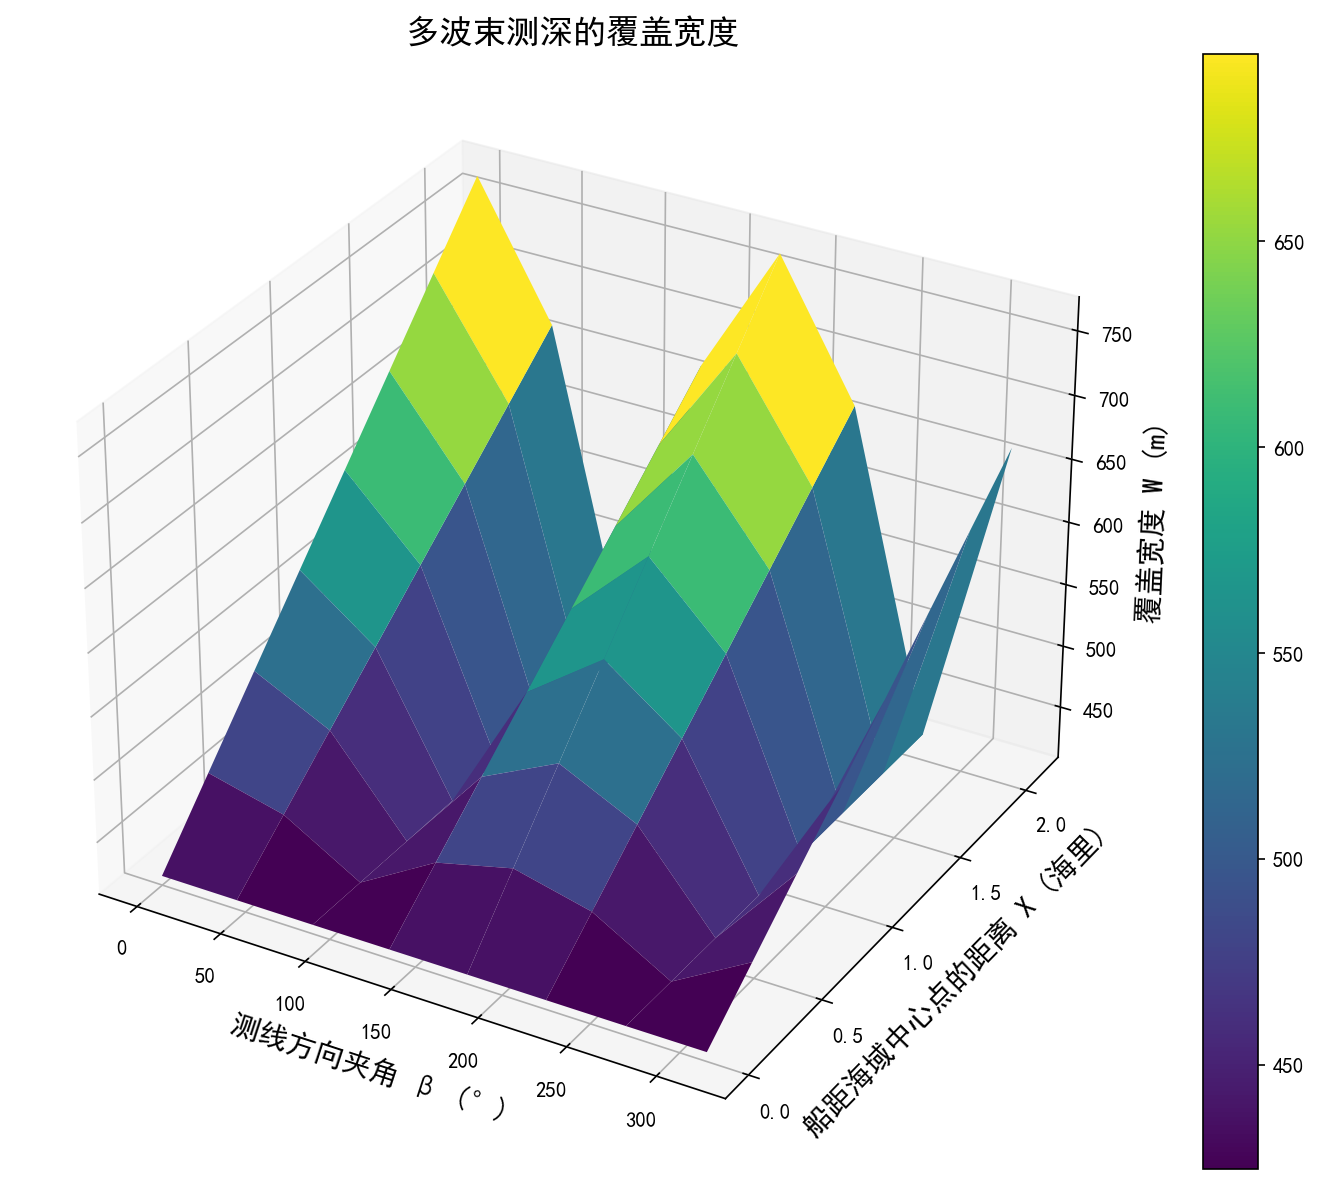

In [37]:
import matplotlib.pyplot as plt

# Set up the figure and axis with higher dpi
fig = plt.figure(figsize=(10, 8), dpi=150)
ax = fig.add_subplot(111, projection='3d')

# Convert radians back to degrees for beta values
beta_degrees = np.degrees(beta_values)

# Create a grid of beta and X values for plotting
B, X_grid = np.meshgrid(beta_degrees, X_values/1852)

# Plot the surface
surf = ax.plot_surface(B, X_grid, results.T, cmap='viridis')

# Set labels and title with larger and bold font
ax.set_xlabel('测线方向夹角 β (°)', fontsize=14, fontweight='bold')
ax.set_ylabel('船距海域中心点的距离 X (海里)', fontsize=14, fontweight='bold')
ax.set_zlabel('覆盖宽度 W (m)', fontsize=14, fontweight='bold')
ax.set_title('多波束测深的覆盖宽度', fontsize=16, fontweight='bold')

# Display the colorbar
fig.colorbar(surf)

# Display the plot
plt.tight_layout()
plt.show()